# Using Python in Jupyter

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

## Let's first include some packages

## Let's do first some basic data types

In [8]:
a = 42 # just an integer
print(a)

42


In [10]:
b = 3.14 # a float
print(b)

3.14


In [12]:
c = (1.1, 2.2,3.3,'a',(3,3,3)) # this is a tuple
print(c)

(1.1, 2.2, 3.3, 'a', (3, 3, 3))


In [14]:
print(c[0]) # remember Python has zero based indexing

1.1


In [16]:
c[0] = 3.3 # tuples are immutable

TypeError: 'tuple' object does not support item assignment

In [18]:
d = [1.1, 2.2, 3.3, 4.4] # this is a list
print(d)

[1.1, 2.2, 3.3, 4.4]


In [5]:
d[0] = 5.5 # lists are mutable
print(d)

[5.5, 2.2, 3.3, 4.4]


In [7]:
e = d # in python: equal operator is passed by reference
print(e)

[5.5, 2.2, 3.3, 4.4]


In [9]:
d[1] = 6.6 # change one element and see the result
print(d)
print(e)

[5.5, 6.6, 3.3, 4.4]
[5.5, 6.6, 3.3, 4.4]


In [11]:
f = d.copy() #to avoid pass by reference, make copy
d[2] = 7.7
print(d)
print(e)
print(f)


[5.5, 6.6, 7.7, 4.4]
[5.5, 6.6, 7.7, 4.4]
[5.5, 6.6, 3.3, 4.4]


## Now onto loops and conditional statements

In [17]:
for i in range(10): # let's make a loop; not including 10
    print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
for i in range(10): # let's make a loop with condition
    if i < 5:
        print(i)

In [15]:
g = [i ** 2 for i in range(10)] # this is called a list comprehension. it's an easy way to create a list.
print(g)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


## Let's use some packages we included

In [5]:
x = np.linspace(0,2*np.pi,10) # numpy is for basic math. it's very similar to Matlab
x1 = np.arange(0,2*np.pi, 0.0001)
y = np.sin(x)
print(x1.shape)

(62832,)


In [7]:
x.dtype # x is now a numpy array of floats

dtype('float64')

In [9]:
omega = [1,2,3,4,5] 
omega_numpy = np.array(omega) # this is how to make a numpy array from a list
omega_numpy

array([1, 2, 3, 4, 5])

## This is not very satisfying. Let's make a plot

Text(0, 0.5, 'y')

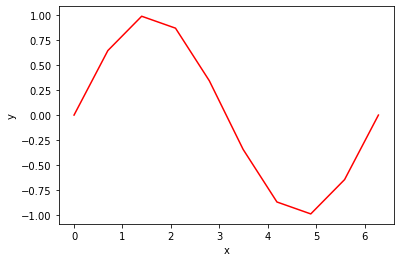

In [11]:
plt.figure()
plt.plot(x,y,'-r')
plt.xlabel('x')
plt.ylabel('y')

## We want more! How about a 3D plot.

Text(0.5, 0, 'z-axis')

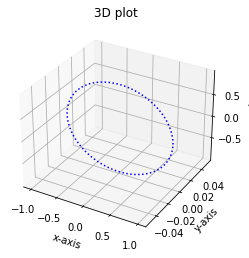

In [13]:
t = np.linspace(0,2*np.pi,100)
x = np.cos(t)
y = np.zeros(x.shape)
z = np.sin(t)

# creating figure 
fig = plt.figure() 
ax  = fig.add_subplot(projection='3d') 
  
# creating the plot 
plot_3D = ax.plot(x, y, z,':b')
  
# setting title and labels 
ax.set_title("3D plot") 
ax.set_xlabel('x-axis') 
ax.set_ylabel('y-axis') 
ax.set_zlabel('z-axis') 

## Nice circle! Now this starts looking like an orbit!

## Now, let's make a function

In [15]:
def lissajous_curve(a,b):
    t = np.linspace(0,2*np.pi,100)
    x = np.cos(a*t)
    y = np.sin(b*t)
    return x,y

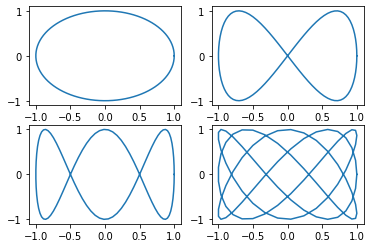

In [17]:
# let's make some plots of the Lissajous curves
fig, axs = plt.subplots(2, 2)
x,y      = lissajous_curve(1,1)
axs[0, 0].plot(x,y)
x,y      = lissajous_curve(1,2)
axs[0, 1].plot(x,y)
x,y      = lissajous_curve(1,3)
axs[1, 0].plot(x,y)
x,y      = lissajous_curve(3,5)
axs[1, 1].plot(x,y)

(-12.08574187092942,
 12.09932104147283,
 -12.096262567736847,
 12.096262567736847)

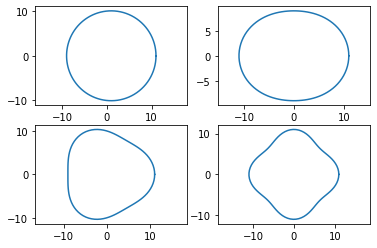

In [19]:
# let's make some small modification to our function
def circular_harmonic(a,r0,r1):
    theta = np.linspace(0,2*np.pi,100)
    r = r1 * np.cos(a*theta) + r0 
    x = r * np.cos(theta) # notice here polar coordinates
    y = r * np.sin(theta)
    return x,y

r0 = 10.0
r1 = 1.0

fig, axs = plt.subplots(2, 2)
x,y      = circular_harmonic(1, r0, r1)
axs[0, 0].plot(x,y)
axs[0, 0].axis('equal')
x,y      = circular_harmonic(2, r0, r1)
axs[0, 1].plot(x,y)
axs[0, 1].axis('equal')
x,y      = circular_harmonic(3, r0, r1)
axs[1, 0].plot(x,y)
axs[1, 0].axis('equal')
x,y      = circular_harmonic(4, r0, r1)
axs[1, 1].plot(x,y)
axs[1, 1].axis('equal')

## Let read an external file now

In [22]:
filename = '/Users/eai/Documents/Teaching/AA179_Anton/data/ISS_coords.txt' # this is an absolute file path. It will be different for you.
data = np.loadtxt(filename)

FileNotFoundError: /Users/eai/Documents/Teaching/AA179_Anton/data/ISS_coords.txt not found.

In [10]:
print(data.shape) # let's see what is the dimension of this dataset

(100000, 4)


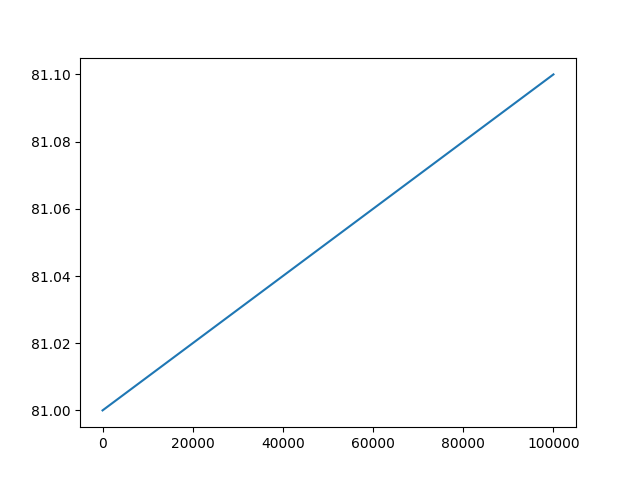

In [11]:
plt.figure()
plt.plot(data[:,0]) # plot the first column (well, it is the one with index zero)

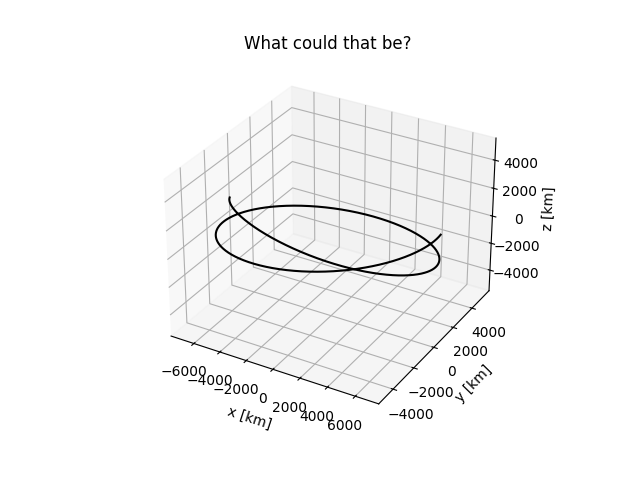

In [12]:
# creating figure 
fig = plt.figure() 
ax  = fig.add_subplot(projection='3d') 

# creating the plot 
plot_3D = ax.plot(data[:,1]/1e3, data[:,2]/1e3, data[:,3]/1e3,'-k')
  
# setting title and labels 
ax.set_title("What could that be?") 
ax.set_xlabel('x [km]') 
ax.set_ylabel('y [km]') 
ax.set_zlabel('z [km]') 
  
# displaying the plot 
plt.show()